In [5]:
import os
import string
import operator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from bs4 import BeautifulSoup

In [6]:
filesList = os.listdir('./3')
if '.DS_store ' in filesList:
    filesList.remove('.DS_store ')
fileNameList = list(map(lambda x: './3/' + x, filesList))
print(fileNameList)

['./3/36_OF_3.html', './3/43_OS_3.html', './3/41_OF_3.html', './3/34_OS_3.html', './3/11_OF_3.html', './3/45_OS_3.html', './3/24_OF_3.html', './3/53_OF_3.html', './3/29_OF_3.html', './3/47_OF_3.html', './3/23_OF_3.html', './3/40_OF_3.html', './3/14_OS_3.html', './3/31_OF_3.html', './3/25_OF_3.html', './3/33_OS_3.html', './3/52_OF_3.html', './3/28_OF_3.html', './3/15_OF_3.html', './3/20_OF_3.html', './3/06_OS_3.htm', './3/39_OF_3.html', './3/02_OF_3.htm', './3/32_OF_3.html', './3/48_OF_3.html', './3/08_OF_3.htm', './3/05_OF_3.htm', './3/04_OF_3.htm', './3/21_OF_3.html', './3/42_OF_3.html', './3/16_OS_3.html', './3/46_OS_3.html', './3/01_OS_3.htm', './3/44_OF_3.html', './3/50_OF_3.html']


### Functions

In [7]:
def readHtml(fileName):
    html = open(fileName)
    soup = BeautifulSoup(html, 'html.parser') 
    return soup

In [8]:
fileName = './3/02_OF_3.htm'
soup = readHtml(fileName)

In [9]:
def read_stop_words(stopFileName):
    file = open(stopFileName)
    words = list(map(lambda x: x[0:-1], file.readlines()))
    return words

In [10]:
stopFileName = 'stopWords.txt'
stopWords = read_stop_words(stopFileName)

In [11]:
def class_contents(className):
    lst = soup.find_all(class_=className)
    text = ''.join([''.join(l.findAll(text=True)) + ' ' for l in lst])
    return text

In [12]:
def list_classes():
    classes = [value for element in soup.find_all(class_=True) for value in element["class"]]
    return classes

In [13]:
classesList = list_classes()

In [14]:
def found_in_class(className, value):
    lst = soup.find_all(class_=className)
    return any(value in l.findAll(text=True) for l in lst)

In [15]:
className = 'Judg-Heading-1'
value = 'Conclusion'
found_in_class(className, value)

False

In [16]:
def found_in_text(lst, value):
    lst = lst[::-1]
    found = lst.index(value) if value in lst else None
    if found:
        return found
    return None

In [17]:
def clean_soup(soup):
    case = list(soup.get_text().split())
    puncs = string.punctuation.translate({ord('('): None, ord(')'): None}) + '’'
    return list(map(lambda x: x.lower(), list(filter(lambda x:  4 < len(x) <= 20 and not any(p in x for p in puncs) and x not in stopWords and x.count('(') == x.count(')'), case))))

In [18]:
def clean_text(lst):
    puncs = string.punctuation.translate({ord('('): None, ord(')'): None}) + '’'
    return list(map(lambda x: x.lower(), list(filter(lambda x:  4 < len(x) <= 20 and not any(p in x for p in puncs) and x not in stopWords and x.count('(') == x.count(')'), case))))

In [19]:
def get_classes(classesList):
    lst = ['Judg-Heading-']
    headingsList = set(filter(lambda x: x if lst[0] in x else None, classesList))
    return headingsList

In [20]:
headingsList = get_classes(classesList)
print(headingsList)

{'Judg-Heading-2', 'Judg-Heading-3', 'Judg-Heading-4', 'Judg-Heading-5', 'Judg-Heading-1'}


In [21]:
for c in headingsList:
    print(class_contents(c))

First element: similarity of marks Third element: likelihood of confusion 
Applicable legal principles Whether the PAR had erred in finding that the competing marks were similar Decision 
(1)   Inherent distinctiveness (2)   Acquired distinctiveness (3)   Visual similarity (4)   Aural similarity (5)   Conceptual similarity (1)   Date of assessment (2)   Likelihood of confusion 
(a)   The device (b)   The word “stone” 
Introduction The opposition proceedings This appeal The court’s role in an appeal The ground of opposition under section 8(2)(b) of the TMA 


# A. Section of the law

In [22]:
print(class_contents('txt-body'))

Tribunal Appeal No 12 of 2015 29 March 2016 High Court  George Wei J   Prithipal Singh and Chow Jian Hong (Mirandah Law LLP) for the appellant; Melvin Pang (Amica Law LLC) for the respondent.   CAESARSTONE SDOT-YAM LTD — CERAMICHE CAESAR SpA  Evidence – Proof of evidence – Judicial notice – Applicant tendered Accounting and Corporate Regulatory Authority report showing number of entities whose names contained common denominator “Caesar” – Whether judicial notice should be taken of such fact Trade Marks and Trade Names – Registration criteria – Conflicts with earlier marks – Registration of trade mark opposed based on earlier trade mark – Whether trade mark similar – Whether likelihood of confusion arising – Whether trade mark well known – Sections 2(7), 2(8), 8(2)(b) and 8(4)(b)(i) Trade Marks Act (Cap 332, 2005 Rev Ed) 


# B. Conclusion exits?

In [23]:
className = 'Judg-Heading-1'
value = 'Conclusion'
found_in_class(className, value)

False

# Clean the text

In [24]:
# get all the text from the html
case = list(soup.get_text().split())
print(len(case))

14151


In [25]:
case = clean_soup(soup)
print(len(case))

4036


In [26]:
# Find the last 'Conclustion' index
lst = case
value = 'Conclusion'
idx = found_in_text(lst, value)
if idx is not None:  
    print(case[-idx:])

# Make Dataset

In [27]:
wordsBag = []
for fileName in fileNameList:
    soup = readHtml(fileName)
    wordsBag += clean_soup(soup)
wordsBagHist = dict(Counter(wordsBag))
sortedBag = sorted(wordsBagHist.items(), key=operator.itemgetter(1), reverse=True)

In [28]:
len(wordsBagHist)

10270

In [29]:
mostFreqWords1 = list(sortedBag[0:650])
mostFreqWords2 = list(filter(lambda x: x[1] > 43, wordsBagHist.items()))

In [30]:
len(mostFreqWords1)
print(mostFreqWords1[0:10])
print(mostFreqWords2[0:10])

[('marks', 3359), ('trade', 3169), ('goods', 2188), ('application', 1666), ('court', 1473), ('earlier', 1420), ('similarity', 1397), ('evidence', 1255), ('singapore', 1102), ('section', 1046)]
[('access', 50), ('sgipos', 181), ('print', 47), ('number', 168), ('trade', 3169), ('decision', 486), ('intellectual', 161), ('property', 177), ('office', 112), ('singapore', 1102)]


In [32]:
wordsBag = list(map(lambda x: x[0], mostFreqWords1))

In [33]:
wordsBag.remove('(refd)')
wordsBag.remove('(iii)')
wordsBag.remove('slr(r)')

In [34]:
len(wordsBag)
# wordsBag

647

In [37]:
def tf_idf_vectorizer(cleanSoup, wordsBag):
    length = len(cleanSoup)
    vec = np.zeros(647 + 3) # win or lose then 299
    for idx, word in enumerate(wordsBag):
        vec[idx] = 1000 * cleanSoup.count(word) / length
    return vec

In [38]:
vec = tf_idf_vectorizer(case, wordsBag)

In [39]:
vec

array([19.57383548, 19.57383548, 11.64519326,  8.67195243, 10.40634291,
        7.92864222,  7.68087215,  7.43310208,  4.70763132,  0.74331021,
        5.20317146,  4.95540139,  4.70763132,  7.43310208,  7.92864222,
        0.49554014,  3.46878097,  8.9197225 ,  9.91080278, 10.40634291,
       11.39742319,  0.        ,  2.22993062,  8.17641229,  6.68979187,
        9.41526264,  3.71655104,  2.47770069,  6.68979187,  2.97324083,
        4.45986125,  4.21209118,  8.42418236,  6.4420218 ,  4.45986125,
        0.99108028,  3.46878097,  0.24777007,  3.96432111,  2.22993062,
        4.95540139,  0.        ,  0.49554014,  4.21209118,  3.46878097,
        0.        ,  0.        ,  1.23885035,  3.71655104,  2.47770069,
        3.71655104,  1.73439049,  3.2210109 ,  0.49554014,  0.        ,
        0.49554014,  2.72547076,  1.23885035,  1.48662042,  1.48662042,
        2.97324083,  2.97324083,  5.6987116 ,  2.47770069,  1.73439049,
        0.24777007,  1.48662042,  0.74331021,  1.73439049,  0.74

In [40]:
def case_class(fileName):
    return fileName[-fileName[::-1].index('.') - 2]

In [41]:
print(case_class(fileName))

3


In [42]:
def has_conclusion(headingsList):
    for heading in headingsList:
        if found_in_class(heading, 'Conclusion'):
            return True
    return False  

In [43]:
print(has_conclusion(headingsList))

True


In [44]:
vec[-3] = int(has_conclusion(headingsList))
vec[-2] = 1 if 'OS' in fileName else 0
vec[-1] = case_class(fileName)

In [45]:
vec

array([19.57383548, 19.57383548, 11.64519326,  8.67195243, 10.40634291,
        7.92864222,  7.68087215,  7.43310208,  4.70763132,  0.74331021,
        5.20317146,  4.95540139,  4.70763132,  7.43310208,  7.92864222,
        0.49554014,  3.46878097,  8.9197225 ,  9.91080278, 10.40634291,
       11.39742319,  0.        ,  2.22993062,  8.17641229,  6.68979187,
        9.41526264,  3.71655104,  2.47770069,  6.68979187,  2.97324083,
        4.45986125,  4.21209118,  8.42418236,  6.4420218 ,  4.45986125,
        0.99108028,  3.46878097,  0.24777007,  3.96432111,  2.22993062,
        4.95540139,  0.        ,  0.49554014,  4.21209118,  3.46878097,
        0.        ,  0.        ,  1.23885035,  3.71655104,  2.47770069,
        3.71655104,  1.73439049,  3.2210109 ,  0.49554014,  0.        ,
        0.49554014,  2.72547076,  1.23885035,  1.48662042,  1.48662042,
        2.97324083,  2.97324083,  5.6987116 ,  2.47770069,  1.73439049,
        0.24777007,  1.48662042,  0.74331021,  1.73439049,  0.74

In [46]:
np.shape(vec)

(650,)

In [47]:
# np.savetxt("data.txt", tuple([vec, vec]))

(array([205.,   0.,   0., 110.,   0.,   0.,   0.,  91.,   0.,   0.,   0.,
         49.,   0.,   0.,   0.,  42.,   0.,   0.,  29.,   0.,   0.,   0.,
         19.,   0.,   0.,   0.,  16.,   0.,   0.,   0.,  11.,   0.,   0.,
          0.,  11.,   0.,   0.,   6.,   0.,   0.,   0.,   5.,   0.,   0.,
          0.,   9.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   4.,   0.,
          0.,   4.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   3.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,   2.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0., 

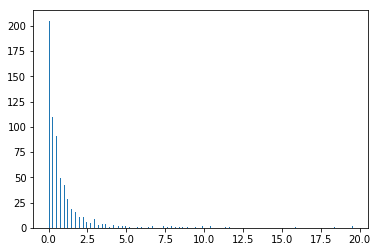

In [52]:
plt.hist(vec, bins=300)